# Environment project
Environment protection is one of the most urgent issues facing our world. Communication of this issue to the public has been done primarily by two main actors: the government and the media. The way these actors frame the issue can have material effects on public perception, whether it be positive or negative. The aim of this project is for you to explore how the environment is presented in various discourses and present any found insights. You will perform your analysis on text data, taken from the Digitalnz API.

Preparation steps
<ul>
<li>Go to https://digitalnz.org/</li>
<li>Register using your email and create a password</li>
<li>Copy your apikey</li>
<li>Look at the "Developer" documentation</li>
</ul>

To make a request to the API, we must first import the requests library.  From there, we can use the ".request(URL)" function, which takes a URL and returns a request object.  The URL "http://api.digitalnz.org/v3/records.json?api_key=hqrCUtiAMUh3ksgfgwmF&text=environment&and[content_partner][]=Radio+New+Zealand&per_page=100" is the request URL for the Digitalnz API.   The URL breaks down as follows: we search <b>Radio New Zealand</b> for articles with the keyword <b>"Environment"</b>.  Read the documentation in for more options.  

In [92]:
import requests

response  = requests.get("http://api.digitalnz.org/v3/records.json?api_key=hqrCUtiAMUh3ksgfgwmF&text=environment&and[content_partner][]=Radio+New+Zealand&fields=title,description,fulltext&per_page=100") 

The next step is to convert the response object into a JSON object to work with the data.  A JSON object is a dictionary; you will use the dictionary operations to get the data you want.  Note that you will first print the JSON object, so you can see what keys store the data you want. In the following code, the titles and the descriptions of articles are read into two lists.   

In [108]:
import json # import json library
json_response = response.json() # convert response


#read to lists
titles = []
description = []
for item in json_response["search"]["results"]:
    titles.append(item["title"])
    description.append(item["description"])


In the next section, you will preprocess your data.  The kind of processing you do is dependent on what you want to do with the data.  

Things to consider
- Which words are valuable to the analysis, and which are not?
- How should you deal with punctuation?
- Upper and lower case characters
- Valid input for potential library functions


In [96]:
import numpy as np #visuaisation
import seaborn as sns # visulisation
import matplotlib.pyplot as plt #visulisation
import pandas
punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*_~'''
no_punc = ""


#create list of stop words using file
stop_word_file = open("stop_words.txt", "r")
read_file = stop_word_file.read().replace('"', '')
stop_word_list = read_file.split(",")
stop_word_list =list( map(lambda x: x.strip(),stop_word_list ))


#your code



Now yo can flex your data muscles.  

Possible ideas
- Look at the words that have the highest occurence
- Look at words that frequently occur together 
- Train a classifier to classify subject (will require manual labelling)

Here's a wee example to get you started. 
- Count the number of times the words in the description occur.
- Filter them down to most occuring
- Take out stop words
- Plot the results

<BarContainer object of 14 artists>

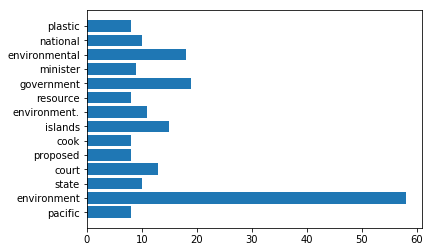

In [109]:
description_flat = " ".join(description).lower()
description_flat_list = titles_flat.split()
word_dict = {}
for word in description_flat_list:
    if word in word_dict:
        word_dict[word] += 1
    else:
        word_dict[word] = 1

        
x_axis = []
y_axis = []
for key in word_dict:
    if word_dict[key] > 7 and not (key in stop_word_list):
        x_axis.append(key)
        y_axis.append(word_dict[key])

plt.barh(x_axis,y_axis)

SyntaxError: invalid syntax (<ipython-input-75-37cb61d2fc0f>, line 1)